### Import all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### read data

In [2]:
data=pd.read_csv('Sales_data_zone_wise.csv')
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


### check for Null

In [3]:
data.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

## 1. The mean sales generated by each zone.


In [4]:
dt=data.mean(numeric_only=True)
dt

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

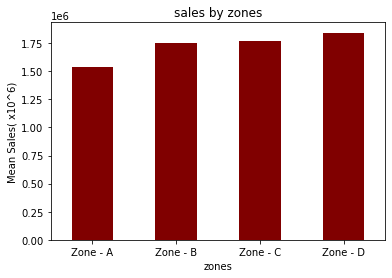

In [5]:
dt.plot(kind='bar',color='maroon')
plt.title('sales by zones')
plt.xticks(rotation=0)
plt.xlabel('zones')
plt.ylabel('Mean Sales( x10^6)')
plt.show()

## 2.Total sales generated by all the zones for each month.


In [6]:
data['Total_Sales']=data['Zone - A']+data['Zone - B']+data['Zone - C']+ data['Zone - D']
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total_Sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


## 3. Check whether all the zones generate the same amount of sales.

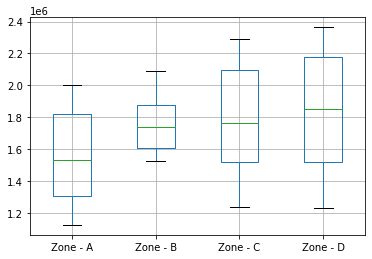

In [7]:
data[['Zone - A','Zone - B','Zone - C','Zone - D']].boxplot()
plt.show()

In [8]:
#H0:The sales generated by all zone are equal
#H1:The sales generated by atleast one zone is different

In [9]:
from scipy.stats import f_oneway

In [10]:
alpha=0.05

In [11]:
fstat,P_value=f_oneway(data['Zone - A'],data['Zone - B'],data['Zone - C'],data['Zone - D'])
fstat,P_value

(5.672056106843581, 0.0011827601694503335)

In [12]:
if P_value > alpha:
    print('we fail to reject the null hypothesis')
else:
    print('we reject the Null hypothesis')

we reject the Null hypothesis


Here the P value is less than alpha value. Therefore, we reject our null hypothesis

we conclude that Sales of atleast one zone differs from the others.